In [26]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Test on Iris Dataset

In [28]:
df = pd.read_csv("iris.csv") #load the dataset
df.drop('Id',axis=1,inplace=True) 

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
# Change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
category = df.values[:, 4]

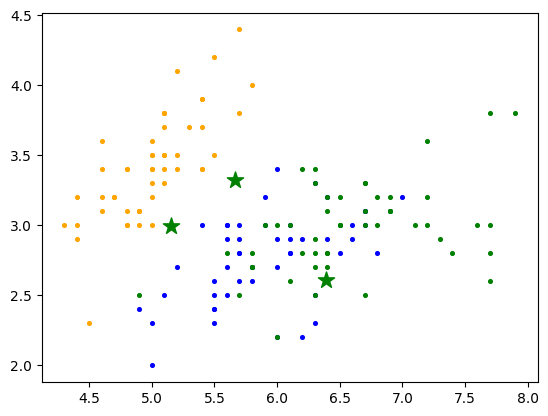

In [31]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [32]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

array([[6.45753425, 2.96986301, 5.2630137 , 1.84520548],
       [5.73333333, 2.60740741, 3.94074074, 1.21851852],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

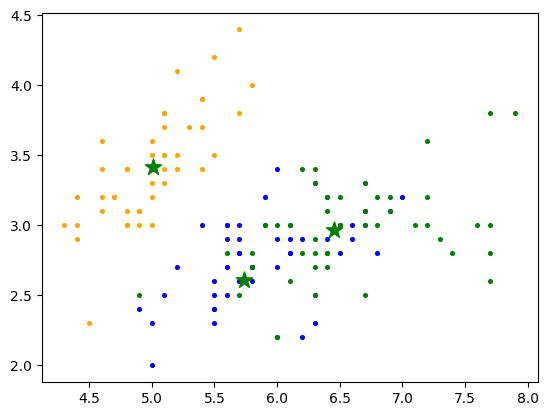

In [33]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [36]:
# Number of clusters
k = 3

# Calculate the average distance of points to their respective centroids
avg_distances = np.zeros(k)
for i in range(k):
    cluster_points = data[clusters == i]
    centroid = centers_new[i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    avg_distances[i] = np.mean(distances)

# Print the average distances
for i in range(k):
    print(f"Average distance to centroid {i}: {avg_distances[i]}")

# Calculate Davies-Bouldin Index
db_index = 0
for i in range(k):
    max_ratio = 0
    for j in range(k):
        if i != j:
            ratio = (avg_distances[i] + avg_distances[j]) / np.linalg.norm(centers_new[i] - centers_new[j])
            if ratio > max_ratio:
                max_ratio = ratio
    db_index += max_ratio

db_index /= k
print(f"Davies-Bouldin Index: {db_index}")

Average distance to centroid 0: 0.8891292829031662
Average distance to centroid 1: 0.5959944614239908
Average distance to centroid 2: 0.4841322496689401
Davies-Bouldin Index: 0.717205368572901


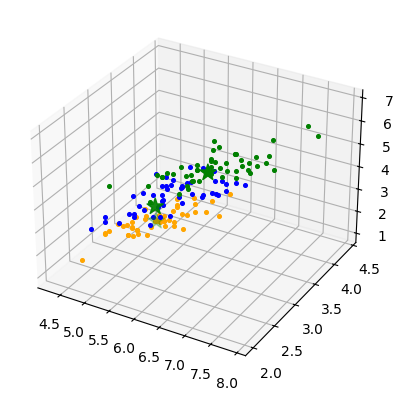

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
for i in range(n):
    ax.scatter(data[i, 0], data[i, 1], data[i, 2], s=7, color=colors[int(category[i])])

# Plot the cluster centers
ax.scatter(centers_new[:, 0], centers_new[:, 1], centers_new[:, 2], marker='*', c='g', s=150)



plt.show()